# Algoritmos Supervisionados

Este relatório descreve como foram aplicados algoritmos supervisionados na base de dados CovType. Também contém escolhas e justificativas dos parâmetros e técnicas utilizadas, assim como uma indicação objetiva de qual algoritmo é melhor para a base selecionada.

## Base de Dados CovType

A base de dados **CovType** contém informações sobre uma grande quantidade de dados relacionados à cobertura florestal, com o objetivo de classificar diferentes tipos de vegetação em uma área geográfica. O conjunto de dados foi originalmente coletado no estado do Colorado, nos Estados Unidos, e é frequentemente utilizado em estudos de aprendizado de máquina, especialmente para problemas de classificação.

### Características da Base de Dados:
- **Número de amostras**: 581.012 instâncias (linhas de dados).
- **Atributos**: 54 características, incluindo variáveis numéricas relacionadas ao ambiente, como:
  - Elevation (altitude),
  - Aspect (orientação da encosta),
  - Slope (declive),
  - Distância até cursos d'água,
  - Dados sobre a vegetação local (como tipo de cobertura florestal).
  
- **Objetivo**: A tarefa principal é classificar o tipo de cobertura do terreno, que é uma variável categórica com 7 classes possíveis de cobertura florestal (por exemplo, florestas de coníferas, florestas de árvores de folha larga, etc.).

### Comportamento em algoritmos supervisionados

A base de dados **CovType** é ótima para testar algoritmos de aprendizado supervisionado, porque possui muitas informações (mais de 580 mil registros) e várias características ambientais, como a elevação e a proximidade de rios, que ajudam a classificar diferentes tipos de vegetação. Cada registro na base contém essas características e um tipo de cobertura florestal, que é a "resposta" que o algoritmo precisa aprender a prever. A tarefa é classificar o tipo de vegetação em uma de sete categorias, o que torna o problema um caso de classificação multiclasse. Como a base tem muitos dados e diferentes tipos de informações, ela permite que os algoritmos encontrem padrões complexos, como quais características estão mais associadas a um tipo de floresta específico. Além disso, apesar de algumas classes de vegetação aparecerem mais vezes que outras (ou seja, a base é desbalanceada), ainda assim é possível treinar modelos que aprendem a fazer previsões de forma precisa, se bem aplicados.

# Análise Exploratória de Dados CovType

Neste relatório, será realizada uma análise exploratória da base de dados CovType, com o objetivo de compreender melhor suas características antes da aplicação de algoritmos supervisionados. Serão apresentados dados gerais do conjunto, como quantidade de amostras e variáveis, além de informações sobre a presença de valores ausentes. Também analisaremos a distribuição da variável alvo (Cover_Type), a distribuição das variáveis numéricas, a correlação entre atributos e a composição das variáveis categóricas relacionadas a áreas selvagens e tipos de solo. Essa análise inicial é fundamental para identificar padrões, possíveis desequilíbrios e particularidades dos dados que poderão influenciar a escolha e a preparação dos modelos de aprendizado supervisionado.

1. Carregamento e Primeira Visão dos Dados

In [41]:
from sklearn.datasets import fetch_covtype
import pandas as pd

# Carregar a base
cov_type = fetch_covtype()
df = pd.DataFrame(cov_type.data, columns=cov_type.feature_names)

# Adicionar a variável alvo (Cover_Type)
df['Cover_Type'] = cov_type.target

# Estatísticas descritivas
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


A análise descritiva da base CovType revela um conjunto de dados com grande diversidade nas características do terreno. A elevação média é de cerca de 2959 metros, com variações significativas, indo de 1859 a 3858 metros. O aspecto (orientação do terreno) tem uma média de 156 graus, variando bastante entre 0 e 360 graus. A declividade média é de 14,1 graus, com alguns terrenos mais íngremes, chegando a 66 graus.

As distâncias para diferentes pontos, como fontes de água e rodovias, também mostram grande dispersão. Por exemplo, a distância média até rodovias é de 2350 metros, mas pode variar de 0 a 7117 metros. Além disso, o tipo de solo é amplamente distribuído, com muitos tipos diferentes de solos representados na base.

Em resumo, os dados revelam uma grande variabilidade nas características do terreno, o que sugere que o modelo de previsão precisará lidar com essa diversidade para fazer boas previsões sobre o tipo de cobertura do terreno. Para isso, decidimos normalizar os dados e aplicar PCA.

2. Análise da Variável Alvo (Cover_Type)

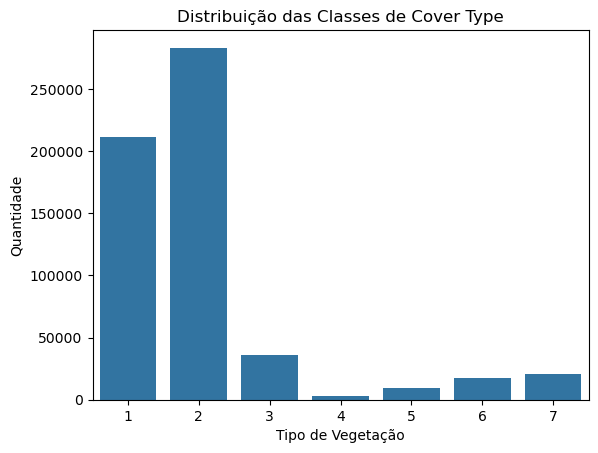

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem das classes
df['Cover_Type'].value_counts()

# Gráfico da distribuição das classes
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribuição das Classes de Cover Type')
plt.xlabel('Tipo de Vegetação')
plt.ylabel('Quantidade')
plt.show()

Esse gráfico nos mostra que 'Cover_Type' é uma variável discreta, e não contínua. Ou seja, algoritmos de classificação são os mais indicados para agrupar essa base de dados.

3. Análise das Variáveis Numéricas

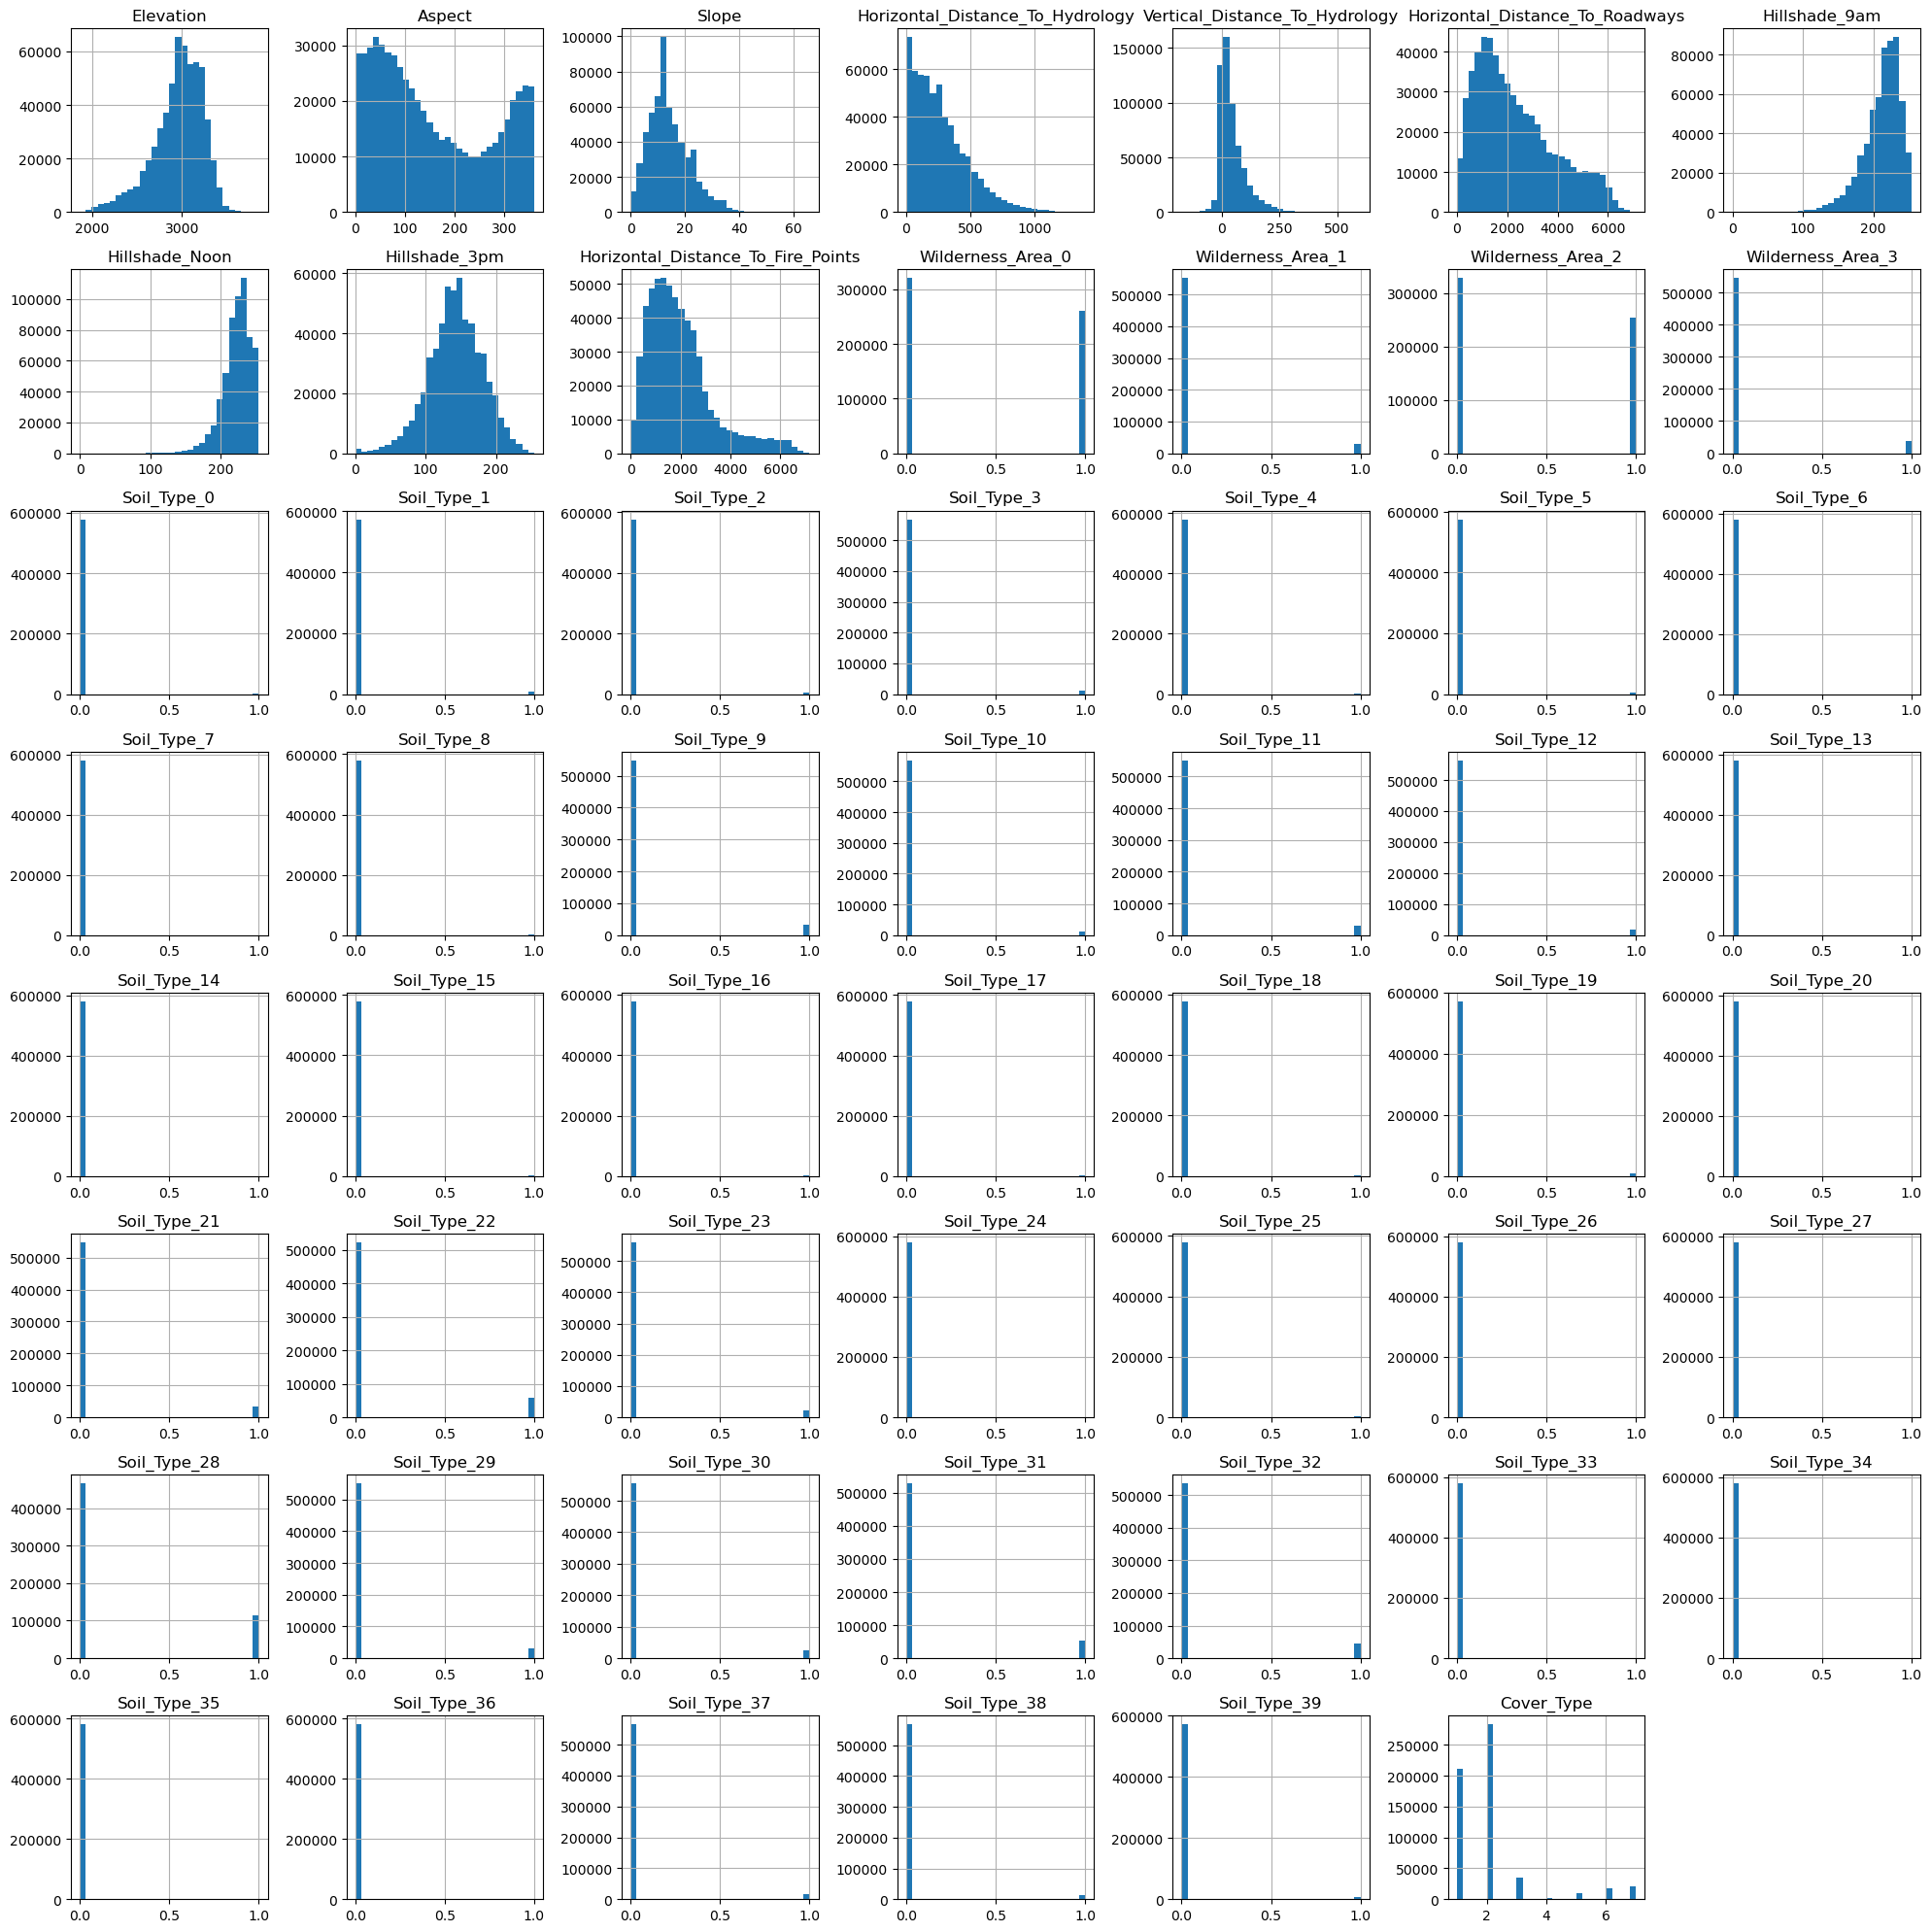

In [43]:
# Histograma de todas as variáveis
df.hist(figsize=(20, 20), bins=30)
plt.tight_layout()
plt.show()

O histograma de todas as variáveis mostra como os dados estão distribuídos. Algumas variáveis, como distâncias para rodovias ou incêndios, têm distribuições assimétricas, com muitos valores concentrados em uma faixa e alguns poucos valores muito distantes, indicando outliers. Outras variáveis, como a elevação, podem ter distribuições mais próximas de uma curva normal, com a maioria dos dados agrupados em torno de um valor central. Também é possível notar picos em algumas distribuições, que são indicativos de outliers, ou seja, valores extremos que estão bem afastados do restante dos dados. 

Além disso, no caso dos 40 tipos de solo da base CovType, 0 indica que o tipo de solo não está presente, e 1 indica que o tipo de solo está presente.
Portanto, os histogramas mostram a distribuição desses valores binários (0 ou 1) para cada tipo de solo, com a maioria dos pontos de dados exibindo 0, ou seja, indicando que o tipo de solo não está presente. A quantidade de 1 indica a presença desse tipo de solo, mas de forma esparsa, já que nem todos os pontos têm o mesmo tipo de solo.

Esses padrões são importantes para entender a natureza dos dados e decidir como tratá-los antes de aplicar modelos de machine learning.

4. Matriz de Correlação

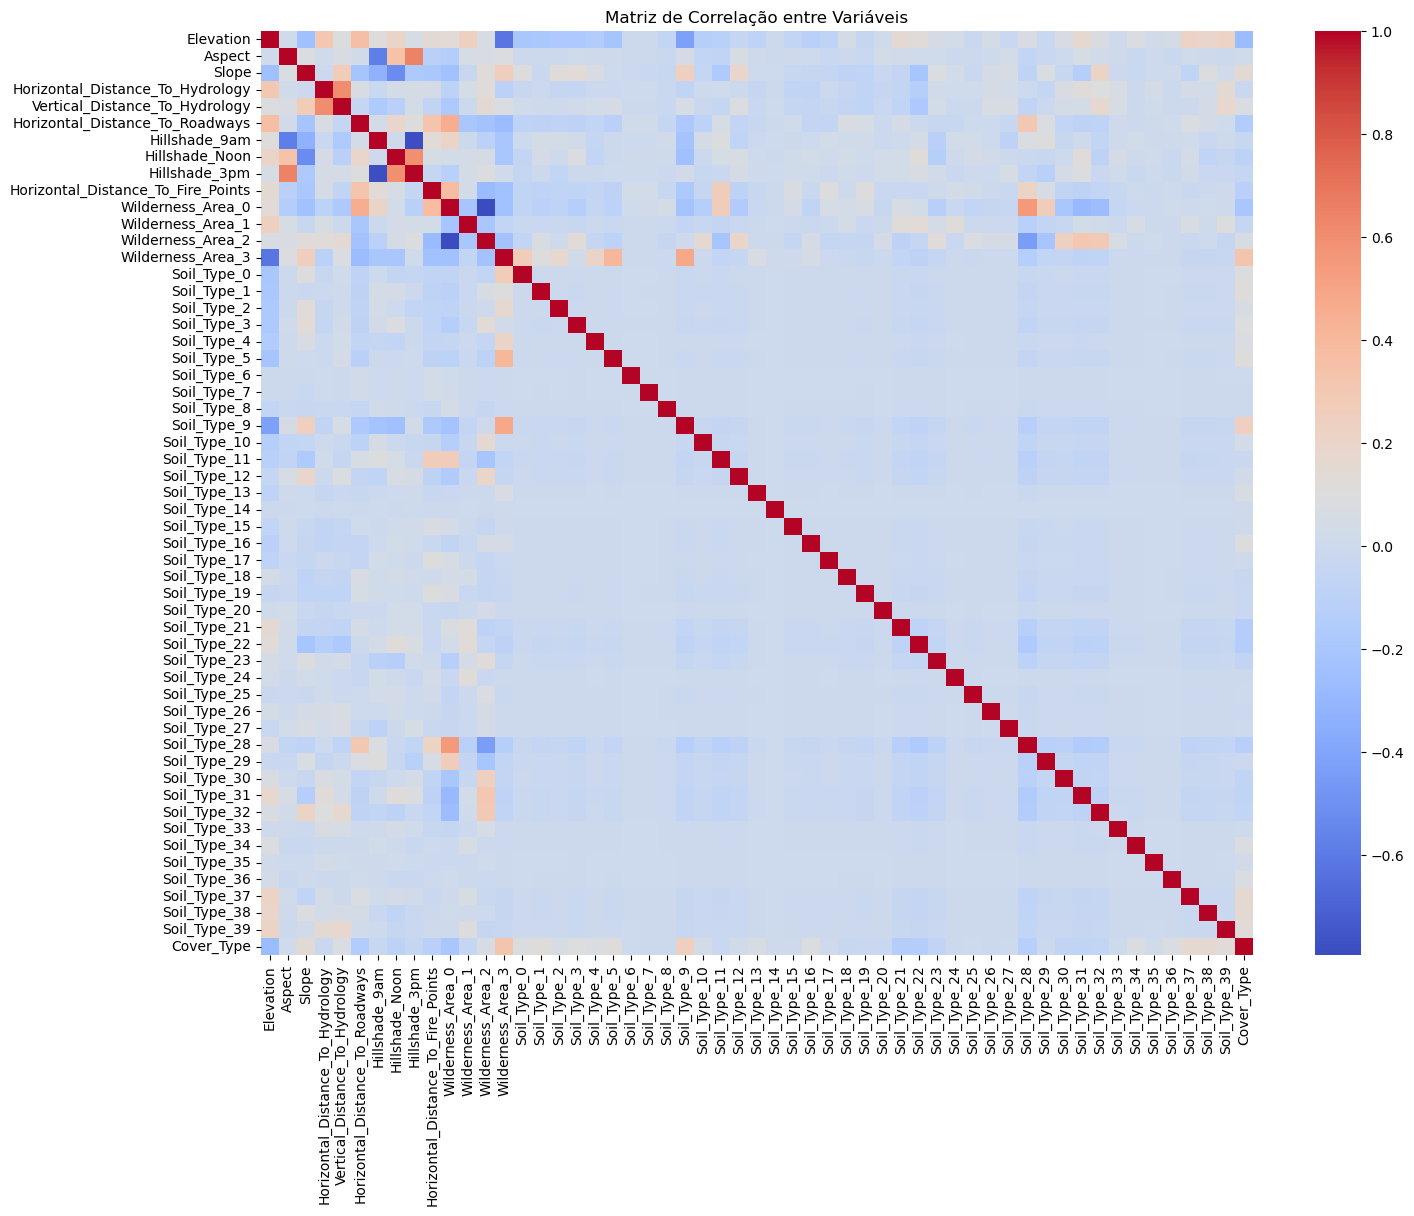

In [44]:
# Matriz de correlação
corr = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

O que podemos inferir do heatmap:

1. Diagonal principal:

* Todos os valores na diagonal são 1.0 (vermelho escuro), pois cada variável é perfeitamente correlacionada com ela mesma.

2. Correlação fraca entre a maioria das variáveis:

* Fora da diagonal, a maioria das correlações está em tons claros ou azulados, indicando baixa ou nenhuma correlação entre muitas variáveis (valores próximos de 0).

3. Algumas correlações notáveis:

* Existe correlação moderada entre algumas variáveis:

    * Elevation com Vertical_Distance_To_Hydrology (ligeiramente positiva).

    * Horizontal_Distance_To_Hydrology com Horizontal_Distance_To_Fire_Points (também mostra alguma correlação).

* Variáveis como Hillshade_9am, Hillshade_Noon e Hillshade_3pm mostram alguma correlação entre si, o que é esperado, já que todas se referem à incidência de luz solar em diferentes horários.

4. Variáveis one-hot encoded:

* Soil_Type_0 até Soil_Type_39 e Wilderness_Area_0 até Wilderness_Area_3 têm correlações próximas de zero entre si (esperado, pois são codificações binárias mutuamente exclusivas).

* Estas colunas não têm relação direta entre si, como esperado em uma codificação one-hot.

5. Variável alvo (Cover_Type):

* Está incluída no canto inferior direito.

* Apresenta correlação muito fraca com todas as variáveis, indicando que nenhuma variável individual explica bem a variável alvo — o que é comum em problemas mais complexos de classificação, exigindo modelos mais sofisticados (ex: florestas aleatórias).

# Escolha dos algoritmos utilizados

Para a base selecionada, a equipe decidiu, dentre as opções disponíveis (KNN, Regressão Linear e Naive Bayes), aplicar KNN e Naive Bayes. 

## Por quê KNN?

O KNN é um algoritmo eficaz para problemas de classificação multiclasse, como o da base de dados CovType, que visa classificar diferentes tipos de vegetação. Além disso, o KNN não faz suposições sobre a distribuição dos dados, o que é vantajoso, pois a base de dados contém características ambientais que podem não seguir uma distribuição conhecida. No entanto, o KNN pode ser computacionalmente caro e sensível à dimensionalidade dos dados, mas ele ainda se destaca pela sua capacidade de lidar bem com a classificação de instâncias com base na proximidade, algo adequado para este tipo de tarefa.

## Por quê Naive Bayes?

Por outro lado, o Naive Bayes é simples, rápido e ideal para problemas de classificação multiclasse. Ele é particularmente eficiente para grandes volumes de dados, como os da base CovType, e lida bem com variáveis contínuas, como aquelas presentes no conjunto de dados. Embora o Naive Bayes faça a suposição de que as variáveis são independentes, o que pode nem sempre ser o caso, ele ainda tende a ter um bom desempenho na prática, especialmente em tarefas de classificação com várias classes.

## Por quê não escolhemos Regressão Linear?

A Regressão Linear, por sua vez, não é a melhor escolha para este problema, pois é um modelo de regressão e não de classificação. Embora existam formas de adaptar a regressão linear para classificação (como em regressão logística), ela não foi projetada para lidar diretamente com problemas de classificação multiclasse como o da base CovType. Além disso, a regressão linear pressupõe que as variáveis possuem uma relação linear com a variável alvo, o que é uma suposição forte e provavelmente não se aplica à classificação de tipos de vegetação, que envolve relações mais complexas.

# Algoritmo Naive Bayes



Primeiramente, importamos as bibliotecas necessárias, carregamos o dataset e verificamos o formato dos dados para garantir que as variáveis X (atributos) e y (rótulos) estejam no formato esperado antes de prosseguir com a modelagem. Isso ajuda a garantir que os dados foram carregados corretamente e que não há problemas com a estrutura, como tamanhos incompatíveis ou dados faltantes.

In [78]:

# Importando as bibliotecas necessárias
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Carregando o dataset
data = fetch_covtype()
X = data.data
y = data.target

# Verificando o formato dos dados
print("Formato de X (atributos):", X.shape)
print("Formato de y (rótulos):", y.shape)

Formato de X (atributos): (581012, 54)
Formato de y (rótulos): (581012,)


Depois, dividimos os dados entre treino (80%) e teste (20%), pois proporciona um bom equilíbrio entre a quantidade de dados para treinar o modelo e a quantidade para testar o modelo, permitindo uma avaliação confiável. Para o teste, 20% é uma quantidade comum usada para validação e avaliação do desempenho do modelo em dados que ele não viu. Já o random_state é uma "semente" que garante que, todas as vezes que o código for executado, a divisão dos dados sempre será a mesma. Poderíamos ter escolhido qualquer número inteiro não negativo, mas escolhemos o 42 por convenção.

In [79]:
# Dividindo os dados entre treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando as dimensões dos dados divididos
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (464809, 54)
Tamanho de X_test: (116203, 54)
Tamanho de y_train: (464809,)
Tamanho de y_test: (116203,)


Agora, precisamos normalizar os dados, decisão tomada com base na observação das estatísticas descritivas da Covertype. A presença de atributos com magnitudes significativamente diferentes (por exemplo, elevação vs. distâncias a hidrologia/estradas) tornam uma boa prática a normalização dos dados. Além disso, decidimos também aplicar PCA, pelos seguintes motivos:
-  Redução da Dimensionalidade: Reduz a complexidade do modelo e o tempo de treinamento, mantendo a maior parte da informação relevante.
-  Eliminação de Multicolinearidade: Eliminar a multicolinearidade e reduzir redundâncias nas variáveis, o que melhora a generalização do modelo.
-  Aumento da Performance do Modelo: Melhorar o tempo de execução do modelo e, em alguns casos, aumentar a performance geral ao reduzir o risco de overfitting.
-  Ruído nos Dados: Focar nas informações mais relevantes e eliminar variações que são apenas ruído.

Número de componentes que explicam 95% da variância: 43


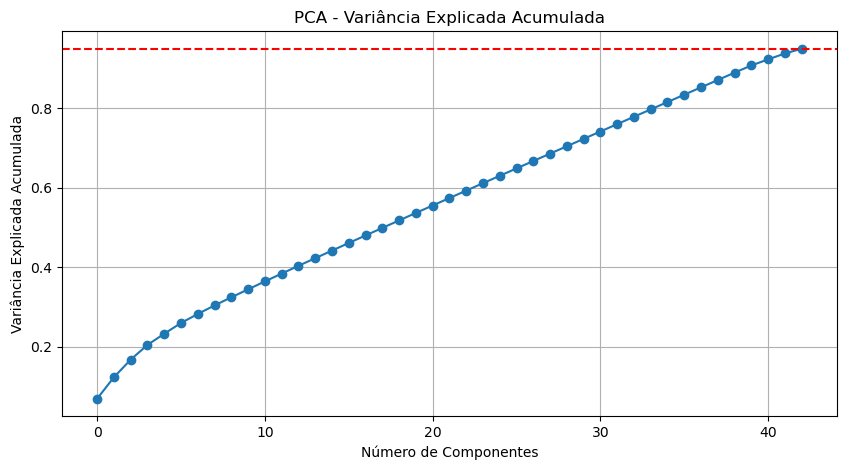

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando PCA para reduzir a dimensionalidade (ex: 95% da variância explicada)
pca = PCA(n_components=0.95)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

print(f"Número de componentes que explicam 95% da variância: {pca.n_components_}")

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada Acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--') 
plt.show()


A seguir, podemos partir para a aplicação do algoritmo supervisionado em si.

O trecho de código abaixo implementa o treinamento e a utilização do modelo de Naive Bayes para classificação. Primeiro, o classificador GaussianNB é importado da biblioteca sklearn.naive_bayes. Esse classificador é baseado no Teorema de Bayes e assume que as características das variáveis seguem uma distribuição normal.

Em seguida, o modelo é instanciado com a criação do objeto nb_model, que será responsável por fazer as previsões. Para treinar o modelo, o método fit() é utilizado, passando os dados de treinamento normalizados (X_train_scaled) e os rótulos correspondentes (y_train). Isso ajusta o modelo aos dados de entrada, permitindo que ele aprenda a relação entre as features e o target.

Depois de treinado, o modelo é usado para prever os rótulos dos dados de teste (X_test_scaled) com o método predict(). Essas previsões são armazenadas na variável y_pred. Por fim, o código exibe os primeiros 10 exemplos das previsões geradas, dando uma amostra dos resultados do modelo.

Sobre o dataset e a escolha do classificador GaussianNB

- Contém atributos contínuos (como elevação, inclinação, distância a rios, etc.).

- Contém atribos binários/categóricos (como tipo de solo e região selvagem codificados como variáveis dummy — 0 ou 1).

Melhor escolha para Naive Bayes:

- GaussianNB:

    * É o mais adequado nesse caso, pois lida bem com os atributos contínuos do Covertype.

    * Pode ser aplicado diretamente, inclusive com dados normalizados.

In [81]:

# Treinando o modelo Naybe Bayes e fazendo predições
from sklearn.naive_bayes import GaussianNB

# Criando o classificador Naive Bayes
nb_model = GaussianNB()

# Treinando o modelo com os dados de treino normalizados
nb_model.fit(X_train_scaled, y_train)

# Fazendo previsões com os dados de teste normalizados
y_pred = nb_model.predict(X_test_scaled)

# Mostrando uma amostra das previsões
print("Exemplos de previsões:", y_pred[:10])

Exemplos de previsões: [1 4 5 2 2 3 5 1 1 5]


O último trecho de código se dedica a avaliar o desempenho do modelo de Naive Bayes utilizando várias métricas de avaliação e visualizando os resultados por meio de gráficos.

Primeiramente, o código calcula as principais métricas de desempenho para o modelo usando os dados de teste (y_test) e as previsões (y_pred), arredondando para 4 casas decimais, a fim garantir um nível razoável de detalhe. São calculados:

- Acurácia: A porcentagem de previsões corretas realizadas pelo modelo.

- Precisão (Precision): A proporção de verdadeiros positivos entre todas as previsões positivas feitas pelo modelo, ponderada pelo número de instâncias em cada classe.

- Recall: A proporção de verdadeiros positivos entre todos os casos reais positivos, também ponderada por classe.

Escolhemos utilizar average='weighted' nas funções precision_score e recall_score porque estamos lidando com um problema de classificação multiclasse (o dataset Covertype tem 7 classes), e as métricas como precisão e recall precisam de uma forma de agregação nesse caso.

O que significa average='weighted'?
Ele calcula a métrica individualmente para cada classe, pondera cada uma pela quantidade de amostras da classe no conjunto de teste (suporte) e tira uma média ponderada.

​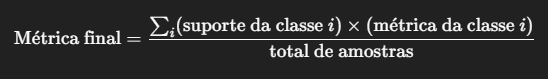
 
Por que usar weighted?

-  Evita que classes maiores dominem a métrica sem controle.

-  Lida bem com desbalanceamento de classes — ou seja, se uma classe aparece muito mais que outras, ela não vai “roubar” toda a avaliação como faria em average='macro'.

Em seguida, o código cria e exibe a matriz de confusão. A matriz é uma ferramenta útil para entender como o modelo está classificando as diferentes classes. Ela mostra os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos para cada classe. A matriz é visualizada com o uso da biblioteca seaborn, gerando um gráfico de calor para facilitar a análise.

Acurácia: 0.4196
Precisão: 0.6611
Recall: 0.4196


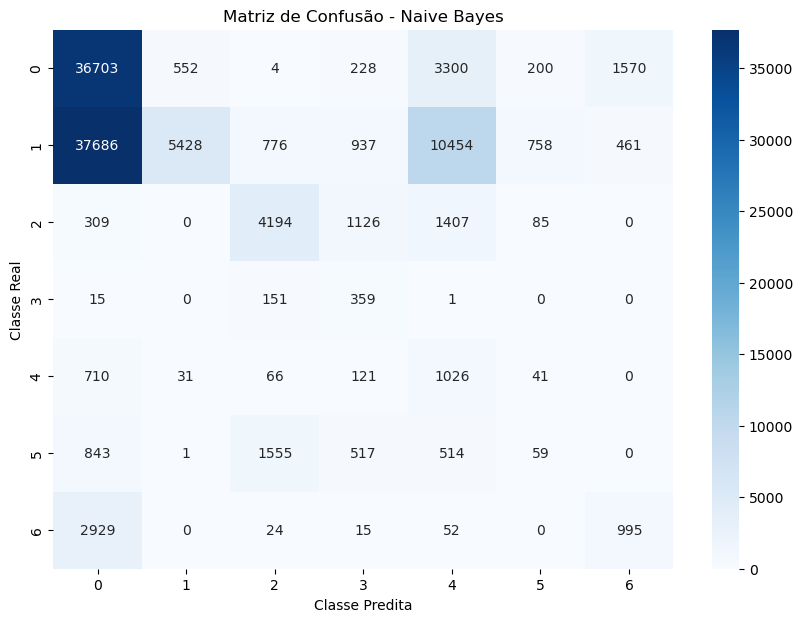

In [82]:

# Avaliando o desempenho do modelo Naive Bayes

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando métricas (usando GaussianNB)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multiclasses
recall = recall_score(y_test, y_pred, average='weighted')

print("Acurácia:", round(accuracy, 4))
print("Precisão:", round(precision, 4))
print("Recall:", round(recall, 4))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibindo matriz de confusão com seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

## 📊 Análise da Matriz de Confusão – Naive Bayes

A matriz de confusão abaixo mostra o desempenho do classificador **Naive Bayes** na predição da variável `Cover_Type`, que possui **7 classes (0 a 6)**.

Cada **linha** representa a **classe real**, enquanto cada **coluna** representa a **classe predita**. Os valores indicam a quantidade de amostras.

---

### 📌 Análise por Classe

#### Classe 0 (real):
- ✅ **36.703** acertos como 0.
- ❌ Erros comuns:
  - **3.300** confundidas com classe 4.
  - **1.570** com classe 6.

#### Classe 1 (real):
- ✅ **5.428** acertos.
- ❌ Muitos erros:
  - **37.686** classificadas como 0.
  - **10.454** como 4.
  - **776** como 2.
- ➤ **Alta confusão com a classe 0**, o que indica que essas classes têm características muito semelhantes.

#### Classe 2 (real):
- ✅ **4.194** acertos.
- ❌ Erros:
  - **1.407** como classe 4.
  - **1.126** como classe 3.

#### Classe 3 (real):
- ✅ Apenas **359** acertos.
- ❌ Baixo desempenho:
  - **151** confundidas com classe 2.

#### Classe 4 (real):
- ✅ **1.026** acertos.
- ❌ **710** confundidas com classe 0.

#### Classe 5 (real):
- ✅ **1.555** acertos.
- ❌ Muitos erros distribuídos em:
  - Classes 0, 2 e 3.

#### Classe 6 (real):
- ✅ **995** acertos.
- ❌ **2.929** confundidas como classe 0.

---

### 🔍 Conclusões

- O modelo teve desempenho **razoável apenas na classe 0**.
- Houve **forte confusão entre as classes 0, 1 e 4**.
- O **Naive Bayes não se adequou bem à base**, provavelmente por:
  - **Alta correlação entre variáveis** (violando a suposição de independência do modelo).
  - **Distribuições complexas** nas variáveis contínuas.
  - **Desbalanceamento entre as classes**.



Por fim, o relatório de classificação é exibido, fornecendo uma visão mais detalhada do desempenho do modelo para cada classe individualmente. Esse relatório inclui métricas como precisão, recall e F1-score para cada classe.

In [83]:
# Relatório completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.46      0.86      0.60     42557
           2       0.90      0.10      0.17     56500
           3       0.62      0.59      0.60      7121
           4       0.11      0.68      0.19       526
           5       0.06      0.51      0.11      1995
           6       0.05      0.02      0.03      3489
           7       0.33      0.25      0.28      4015

    accuracy                           0.42    116203
   macro avg       0.36      0.43      0.28    116203
weighted avg       0.66      0.42      0.36    116203



# Algoritmo KNN

Primeiramente, precisamos decidir se vamos utilizar classificação ou regressão com o algoritmo KNN. 
Utilizamos classificação quando o rótulo for categórico ou discreto. Ou seja, quando desejamos prever uma categoria ou classe (por exemplo, 'sim' ou 'não', 'gato' ou 'cachorro'). O KNN irá prever a classe da nova amostra com base no voto da maioria dos seus k vizinhos mais próximos.
Por outro lado, utilizamos regressão quando o rótulo for contínuo, ou seja, um número real (por exemplo: altura, preço, temperatura). Nesse caso, o KNN retorna a média (ou média ponderada) dos valores dos vizinhos mais próximos.

Dessa forma, decidimos utilizar o KNN para classificação por três motivos principais:
1. A variável-alvo é 'Cover_Type', que representa categorias de cobertura do solo - como diferentes tipos de florestas. Segundo a descrição da bae no UCI Machine Learning Repository, ela assume valores inteiros de 1 a 7, correspondendo a sete tipos distintos de cobertura florestal.

2. Os gráficos da análise preliminar demonstram que 'Cover_Type' é uma variável discreta, com distribição claramente categórica. Isso confirma que se trata de uma tarefa de classificação multiclasse.

3. O respositório analisado utiliza o algoritmo Naive Bayes, que é também um classificador. Comparar dois classificadores (Naive Bayes vs. KNN) mantém a coerência metodológica e permite avaliar desempenho em uma mesma tarefa supervisionada.

### Gráfico de apoio

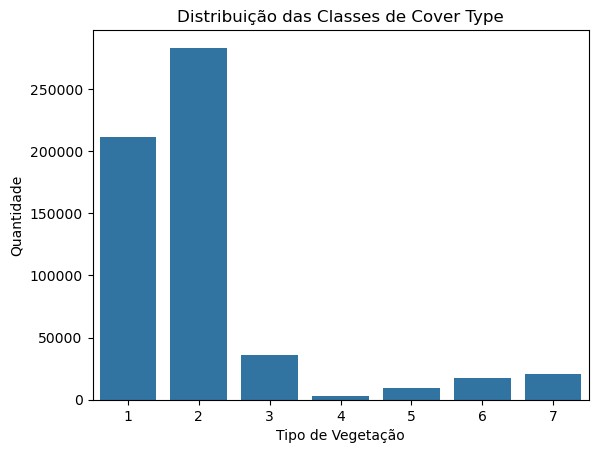

O gráfico acima mostra claramente que a variável-alvo não possui continuidade, sendo mais adequado o uso de algoritmos de classificação.

Dessa forma, podemos iniciar a importação das bibliotecas necessárias, carregar o dataset e preparar o dataframe.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cov_type = fetch_covtype()

# Preparando o DataFrame
df = pd.DataFrame(cov_type.data, columns=[
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'] + [f'Soil_Type_{i}' for i in range(40)] + 
    ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'])

df['target'] = cov_type.target

Depois, selecionamos aleatoriamente 100.000 amostras do conjunto de dados original com o objetivo de otimizar o tempo de processamento. Em seguida, separamos as variáveis independentes (armazenadas em X) da variável dependente (armazenada em y, que representa a classe a ser prevista). Por fim, dividimos os dados em conjuntos de treino e teste, mantendo a proporção original das classes (estratificação), sendo 70% para treino e 30% para teste. Essa divisão é feita antes da aplicação do PCA.

In [85]:
# Separando X e y
df_sample = df.sample(n=100000, random_state=42)
X = df_sample.drop('target', axis=1)
y = df_sample['target']

# Dividindo em treino e teste (antes de aplicar o PCA)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

Na próxima etapa, os dados são primeiro normalizados utilizando o StandardScaler, que padroniza as variáveis para que tenham média 0 e desvio padrão 1 — o que é essencial para muitos algoritmos de machine learning, especialmente o PCA. Após a normalização, aplicamos PCA com o parâmetro n_components=0.95, o que significa que o modelo irá manter o menor número possível de componentes principais que preservem 95% da variância original dos dados. Isso reduz a dimensionalidade do conjunto de dados, facilitando o processamento e potencialmente melhorando o desempenho do modelo. Por fim, é exibido o número de componentes que foram mantidas após a transformação.

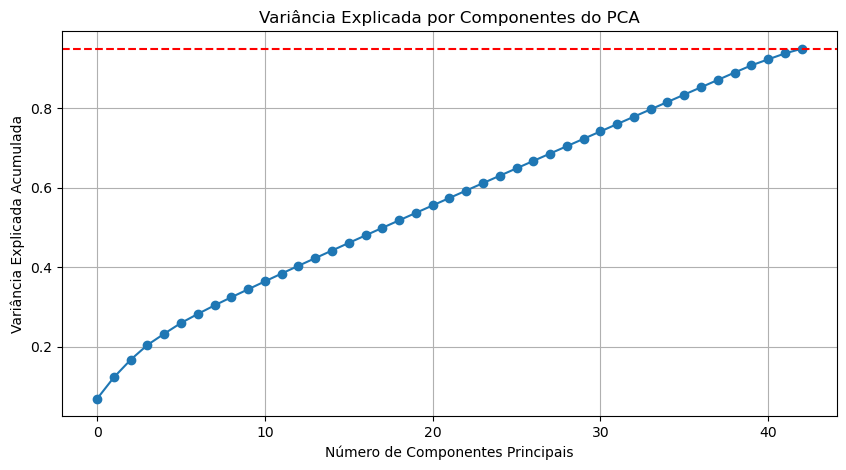

Número de componentes principais mantidas: 43


In [86]:
# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando PCA
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Gráfico de variância explicada
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada por Componentes do PCA')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  
plt.show()

# Verificando quantas componentes foram mantidas
print(f"Número de componentes principais mantidas: {pca.n_components_}")

Então, fazemos uma busca pelos melhores valores de k (de 1 a 20) para o algoritmo KNN, testando três diferentes métricas de distância: euclidean, manhattan e minkowski. Para cada combinação, calculamos a acurácia com os dados reduzidos pelo PCA. Em seguida, os resultados são plotados em um gráfico comparativo para visualizar o desempenho de cada métrica. Por fim, o código identifica e exibe qual valor de k gerou a melhor acurácia para cada tipo de distância.

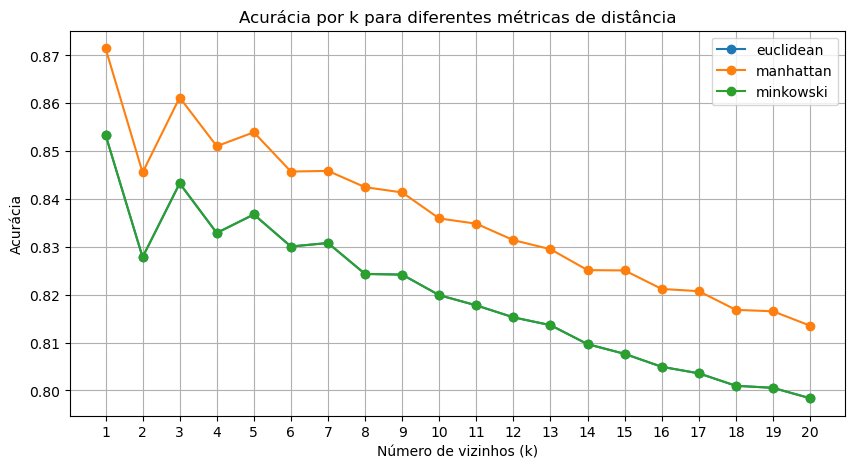

Melhor valor de k para euclidean: 1 com acurácia: 0.8534
Melhor valor de k para manhattan: 1 com acurácia: 0.8715
Melhor valor de k para minkowski: 1 com acurácia: 0.8534


In [87]:
# Definindo o intervalo de valores de k para testar (1 a 20)
k_values = range(1, 21)
metrics = ['euclidean', 'manhattan', 'minkowski']

# Dicionários para armazenar acurácias
accuracies = {metric: [] for metric in metrics}

# Testando diferentes valores de k e diferentes métricas de distância
for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_pca, y_train)  
        y_pred = knn.predict(X_test_pca)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies[metric].append(accuracy)

# Plotando os resultados para comparar as métricas de distância
plt.figure(figsize=(10, 5))

for metric in metrics:
    plt.plot(k_values, accuracies[metric], '-o', label=metric)

plt.title('Acurácia por k para diferentes métricas de distância')
plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.xticks(k_values) 
plt.show()

# Melhor k para cada tipo de distância
melhor_k = {metric: k_values[np.argmax(accuracies[metric])] for metric in metrics}
melhor_acuracia = {metric: max(accuracies[metric]) for metric in metrics}

# Exibindo o melhor k e acurácia para cada métrica
for metric in metrics:
    print(f"Melhor valor de k para {metric}: {melhor_k[metric]} com acurácia: {melhor_acuracia[metric]:.4f}")

O próximo trecho de código define o modelo final do KNN usando a melhor métrica de distância (manhattan) e o melhor valor de k encontrado anteriormente. O modelo é treinado com os dados de treino já normalizados e transformados pelo PCA, e depois faz previsões nos dados de teste. Em seguida, são calculadas e exibidas as métricas de desempenho: acurácia, precisão e recall, permitindo avaliar a performance do modelo final otimizado.

In [88]:
# Definindo o melhor k e a melhor métrica com base nos resultados
melhor_k = melhor_k['manhattan'] 
melhor_metric = 'manhattan'  

# Modelo final com a melhor métrica
knn_final = KNeighborsClassifier(n_neighbors=melhor_k, metric=melhor_metric)
knn_final.fit(X_train_pca, y_train)
y_pred_knn = knn_final.predict(X_test_pca)

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

print("\nAcurácia:", round(accuracy, 4))
print("Precisão:", round(precision, 4))
print("Recall:", round(recall, 4))


Acurácia: 0.8715
Precisão: 0.8715
Recall: 0.8715


Logo após, o trecho abaixo gera a matriz de confusão do modelo KNN otimizado com PCA, permitindo visualizar como o classificador está acertando ou errando cada classe. A matriz é exibida com seaborn para facilitar a leitura. 

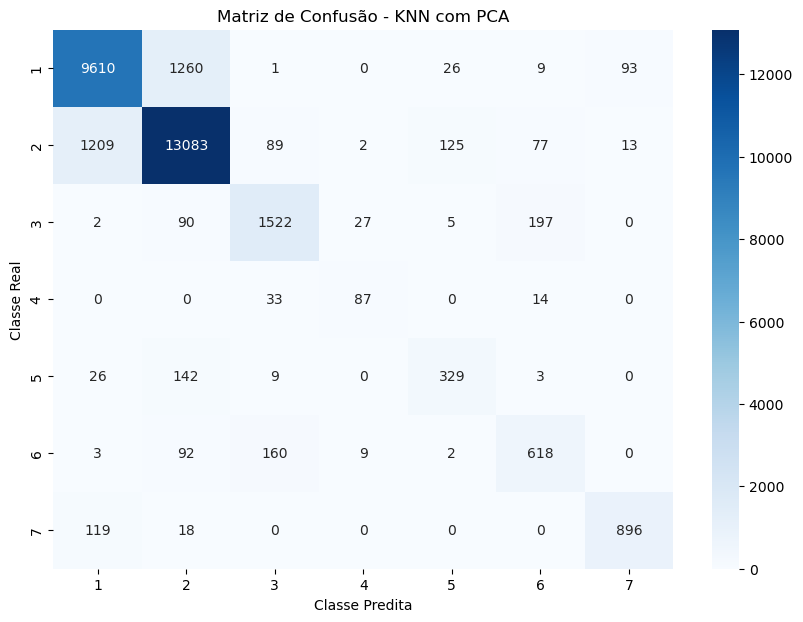

In [89]:

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_knn)

# Exibindo matriz de confusão com seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - KNN com PCA")
plt.show()

## 📊 Análise da Matriz de Confusão – KNN com PCA

Esta matriz de confusão mostra os resultados do classificador K-Nearest Neighbors (KNN) com aplicação de PCA (Análise de Componentes Principais) para redução de dimensionalidade no dataset Covertype.

Cada linha representa a classe real e cada coluna representa a classe predita.

### 📌 Análise por Classe

#### Classe 1 (real):
- ✅ 9.610 amostras corretamente classificadas.
- ❌ Principais confusões:
  - 1.260 foram classificadas como classe 2.
  - Erros menores nas classes 7 (93) e 6 (9).

#### Classe 2 (real):
- ✅ 13.083 amostras corretamente classificadas.
- ❌ Principais confusões:
  - 1.209 com classe 1.
  - Outras com classe 3 (89), classe 5 (125), classe 6 (77).

#### Classe 3 (real):
- ✅ 1.522 acertos.
- ❌ Erros em:
  - Classe 6 (197),
  - Classe 4 (27),
  - Classe 2 (90).

#### Classe 4 (real):
- ✅ 87 acertos.
- ❌ Confusões principais com:
  - Classe 3 (33),
  - Classe 6 (14).

#### Classe 5 (real):
- ✅ 329 acertos.
- ❌ Confusões principais:
  - Classe 2 (142),
  - Classe 6 (3), 
  - Classe 1 (26).

#### Classe 6 (real):
- ✅ 618 acertos.
- ❌ Confundida principalmente com:
  - Classe 3 (160),
  - Classe 2 (92).

#### Classe 7 (real):
- ✅ 896 acertos.
- ❌ Erros pequenos, mas existentes:
  - Classe 1 (119), 
  - Classe 2 (18).

### ✅ Considerações Finais
- O modelo KNN com PCA teve bom desempenho nas classes 1 e 2, que são as mais frequentes.
- As classes com menos amostras (como 4, 5, 6 e 7) apresentaram mais confusão, o que é comum em classificadores com dados desbalanceados.
- Comparado ao Naive Bayes, este modelo apresenta maior acurácia e menos confusão entre as classes, especialmente entre as duas mais numerosas.


Por fim, é impresso o relatório de classificação, que traz as métricas detalhadas por classe (precisão, recall, f1-score e suporte), oferecendo uma avaliação completa do desempenho do modelo final em cada categoria.

In [90]:
# Avaliação final
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))


Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.88      0.87      0.87     10999
           2       0.89      0.90      0.89     14598
           3       0.84      0.83      0.83      1843
           4       0.70      0.65      0.67       134
           5       0.68      0.65      0.66       509
           6       0.67      0.70      0.69       884
           7       0.89      0.87      0.88      1033

    accuracy                           0.87     30000
   macro avg       0.79      0.78      0.79     30000
weighted avg       0.87      0.87      0.87     30000



# Comparando o relatório de classificação dos algoritmos para a base Cobertype

Comparando os resultados dos dois algoritmos, podemos observar diferenças significativas no desempenho:

### Naive Bayes:

-  Acurácia: 0.4196

-  Precisão: 0.6611

-  Recall: 0.4196

-  F1-Score (macro avg): 0.36

-  F1-Score (weighted avg): 0.66

O modelo de Naive Bayes apresenta uma acurácia de 41.96%, o que é bastante abaixo do desejado para uma boa classificação. A precisão é razoável (66.11%), mas o recall de 41.96% indica que o modelo tem dificuldade em identificar corretamente as instâncias da classe positiva. O desempenho do modelo é mais evidenciado pela média ponderada do f1-score (0.36), que também é baixa. O modelo tem bons resultados em algumas classes, mas apresenta dificuldades em classes com menor suporte, como as classes 4, 5, 6 e 7, que têm recall muito baixo, o que significa que ele falha em capturar muitas instâncias dessas classes.

### KNN:

-  Acurácia: 0.8715

-  Precisão: 0.8715

-  Recall: 0.8715

-  F1-Score (macro avg): 0.79

-  F1-Score (weighted avg): 0.87

O KNN apresenta resultados bem melhores. A acurácia de 87.15% é muito superior à do Naive Bayes. A precisão e recall de 87.15% indicam que o modelo tem um bom equilíbrio entre prever corretamente as classes e capturar a maior parte das instâncias positivas. O f1-score médio ponderado de 0.87 é significativamente superior ao do Naive Bayes, o que indica que o KNN consegue fazer uma boa combinação de precisão e recall.

### Conclusão:

O modelo KNN apresentou resultados muito mais robustos em comparação com o Naive Bayes, com uma acurácia muito mais alta (87.15% contra 41.96%) e métricas de desempenho mais consistentes, como precisão e recall em torno de 87%, o que indica um modelo equilibrado e eficaz para esta tarefa de classificação.

-  O Naive Bayes teve dificuldades com algumas classes, especialmente aquelas com menor suporte (como 4, 5, 6 e 7), e seu desempenho geral é mais fraco.

-  O KNN, por outro lado, mostrou um desempenho mais robusto e uniforme em todas as classes, com destaque para a boa precisão e recall, tornando-o o modelo preferido para este conjunto de dados.

Portanto, o KNN trouxe melhores resultados em termos de acurácia, precisão, recall e f1-score para o dataset Covertype.